In [3]:
from load_results import load_result_dataset
import pandas as pd

pn1 = 'full_fine_tuning_50epochs_edge_paper_final2'
pn2 = 'full_fine_tuning_50epochs_paper_final2'
pn3 = 'none'
final_data1 = load_result_dataset(pn1, pn2, pn3)
final_data1 = [{**d, 'ft_strategy': 'FFT (50 epochs)'} for d in final_data1]
df1 = pd.DataFrame(final_data1)

pn1 = 'full_fine_tuning_5epochs_edge_article1'
pn2 = 'full_fine_tuning_5epochs_article1'
pn3 = 'none'
final_data2 = load_result_dataset(pn1, pn2, pn3)
final_data2 = [{**d, 'ft_strategy': 'FFT (5 epochs)'} for d in final_data2]
df2 = pd.DataFrame(final_data2)

pn1 = 'linearprobe_50epochs_edge_paper_final2'
pn2 = 'linearprobe_50epochs_paper_final2'
pn3 = 'none'
final_data3 = load_result_dataset(pn1, pn2, pn3)
final_data3 = [{**d, 'ft_strategy': 'LP (50 epochs)'} for d in final_data3]
df3 = pd.DataFrame(final_data3)

df = pd.concat([ df1, df2, df3 ], axis=0, ignore_index=True) 

final_data = []
final_data.extend(final_data1)
final_data.extend(final_data2)
final_data.extend(final_data3)

../results/none/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/robust_resnet50_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/robust_resnet50_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/vit_small_patch16_224.augreg_in21k_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50

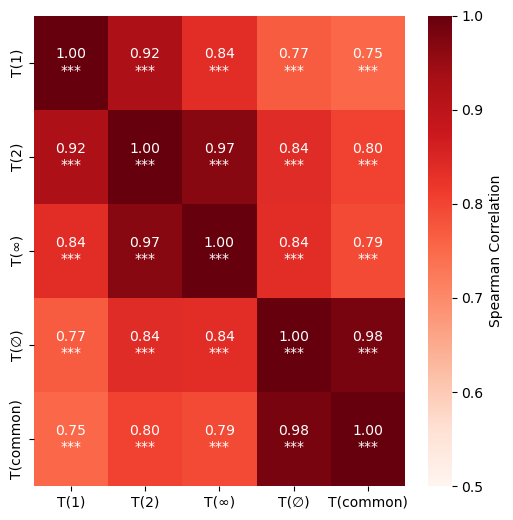

In [4]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


fft_50_df = df[df["ft_strategy"] == "FFT (50 epochs)"]

# Select only the relevant accuracy columns
metrics = ["L1_acc", "L2_acc", "Linf_acc", "common_acc", "clean_acc"]
fft_50_metrics = fft_50_df[metrics]

# Drop rows with any missing values in selected metrics
fft_50_metrics_clean = fft_50_metrics.dropna()

# Compute correlation matrix
correlation_matrix = fft_50_metrics_clean.corr(method='spearman')

metrics = [ "L1_acc", "L2_acc", "Linf_acc", "common_acc", "clean_acc" ]

# Compute Spearman rank correlations and corresponding p-values
corr_matrix = np.zeros((len(metrics), len(metrics)))
pval_matrix = np.zeros((len(metrics), len(metrics)))

for i, m1 in enumerate(metrics):
    for j, m2 in enumerate(metrics):
        corr, pval = stats.spearmanr(fft_50_metrics_clean[m1], fft_50_metrics_clean[m2])
        corr_matrix[i, j] = corr
        pval_matrix[i, j] = pval

# Create annotations with correlation and p-value
annotations = np.empty_like(corr_matrix, dtype=object)
for i in range(len(metrics)):
    for j in range(len(metrics)):
        annotations[i, j] = f"{corr_matrix[i, j]:.2f}\n(p={pval_matrix[i, j]:.2g})"

# Create annotations with correlation and asterisk significance levels
def pval_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

annotations_stars = np.empty_like(corr_matrix, dtype=object)
for i in range(len(metrics)):
    for j in range(len(metrics)):
        stars = pval_to_stars(pval_matrix[i, j])
        annotations_stars[i, j] = f"{corr_matrix[i, j]:.2f}\n{stars}"

# Plot 500x500 version with significance stars
custom_labels = [r"T(1)", r"T(2)", r"T(∞)", r"T(∅)", r"T(common)"]

# Plot 500x500 version with custom axis labels
plt.figure(figsize=(5, 5), dpi=100)

sns.heatmap(
    corr_matrix,
    annot=annotations_stars,
    fmt='',
    xticklabels=custom_labels,
    yticklabels=custom_labels,
    cmap='Reds',
    vmin=0.5,
    vmax=1.0,
    cbar_kws={'label': 'Spearman Correlation'}
)

plt.tight_layout(pad=0)

output_path_final = "./paper_figures/fft50_spearman_heatmap_red_500px_stars_custom_labels.png"
plt.savefig(output_path_final, bbox_inches='tight', dpi=100)
plt.show()
